# DATA EXPLORATION

## Importing Necessary Libraries

In [1]:
import datasets                                     # To load dataset from huggingface
from datasets import load_dataset                   
import pandas as pd                                 # For pandas Dataframe 
import os                                           # To get current working directory

import re                                           
from nltk.tokenize import word_tokenize             # For tokenizing words
from nltk.corpus import stopwords                   # For removing stopwords
from nltk.stem import WordNetLemmatizer             # Getting root of word eg cat instead of cats
from langdetect import detect                       # Removing Non english language







### Loading Dataset from the Hugging Face

### Save to RAW data folder

In [2]:
# Get the current directory
current_directory = os.getcwd()

# Navigate one folder back to the parent directory
parent_directory = os.path.dirname(current_directory)

# Navigate to the "data" folder inside the parent directory
data_directory = os.path.join(parent_directory, "Data")

# Navigate to the "processed" subfolder inside the "data" folder
processed_directory = os.path.join(data_directory, "RAW")



In [6]:
dataset = load_dataset("AI4Math/MathVista")

dataset.save_to_disk(processed_directory)


Saving the dataset (0/1 shards):   0%|          | 0/1000 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/5141 [00:00<?, ? examples/s]

In [7]:
# We will see what is the type of our data
type(dataset) 
# Our Dataset is in JSON format (Dictionary)

datasets.dataset_dict.DatasetDict

In [8]:
dataset.keys()    # Seeing keys

dict_keys(['testmini', 'test'])

### We will can now access elements of JSON file

#### We will use test instead of Test Mini Since Test has 4000 more samples

{'pid': '1011', 'question': 'Is this a function of x?', 'image': 'images/1011.jpg', 'decoded_image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=350x368 at 0x171E39A00>, 'choices': ['Yes', 'No'], 'unit': None, 'precision': None, 'answer': '', 'question_type': 'multi_choice', 'answer_type': 'text', 'metadata': {'category': 'math-targeted-vqa', 'context': 'function plot', 'grade': 'college', 'img_height': 368, 'img_width': 350, 'language': 'english', 'skills': ['algebraic reasoning'], 'source': 'FunctionQA', 'split': 'test', 'task': 'textbook question answering'}, 'query': 'Hint: Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end.\nQuestion: Is this a function of x?\nChoices:\n(A) Yes\n(B) No'}
1011
Is this a function of x?
Hint: Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end.
Question: Is this a function of x?
Choices:
(A) Yes
(B) No
images/1011.jpg



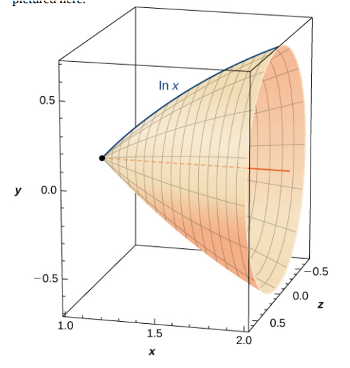

In [9]:
print(dataset["test"][10])              #print the first example on the testmini set
print(dataset["test"][10]['pid'])       # print the problem id 
print(dataset["test"][10]['question'])  # print the question text 
print(dataset["test"][10]['query'])     # print the query text
print(dataset["test"][10]['image'])     # print the image path
print(dataset["test"][10]['answer'])    # print the answer
dataset["test"][10]['decoded_image']    # display the image

### We will now convert data to a Data Frame.

In [10]:
train_data = load_dataset("AI4Math/MathVista", split="test")
df = pd.DataFrame(train_data)

In [11]:
# Print the DataFrame to see all columns
print(df.columns)
# There are some additional classes present in metadata column. 

Index(['pid', 'question', 'image', 'decoded_image', 'choices', 'unit',
       'precision', 'answer', 'question_type', 'answer_type', 'metadata',
       'query'],
      dtype='object')


### We will see the columns inside Metadata

In [12]:
# Convert the 'metadata' Series to a DataFrame
metadata_df = df['metadata'].apply(pd.Series)

# Now you can access the columns of the metadata DataFrame
metadata_columns = metadata_df.columns
print(metadata_columns)


Index(['category', 'context', 'grade', 'img_height', 'img_width', 'language',
       'skills', 'source', 'split', 'task'],
      dtype='object')


### Now we can see each sub meta data class individually

In [13]:
# Access the 'metadata' column and extract the 'task' key from each dictionary
tasks = df['metadata'].apply(lambda x: x.get('task', None))

# Print the extracted tasks
print(tasks.unique())

# Metadata tasks has 5 different classes as shown. 

['figure question answering' 'visual question answering'
 'math word problem' 'geometry problem solving'
 'textbook question answering']


In [14]:
# Access the 'metadata' column and extract the 'task' key from each dictionary
category = df['metadata'].apply(lambda x: x.get('category', None))

# Print the extracted tasks
print(category.unique())

# Metadata Category has 2 different classes as shown. 

['general-vqa' 'math-targeted-vqa']


In [15]:
# Access the 'metadata' column and extract the 'grade' key from each dictionary
category = df['metadata'].apply(lambda x: x.get('grade', None))

# Print the extracted tasks
print(category.unique())

# Metadata Grade has 4 different classes as shown. 

['daily life' 'elementary school' 'high school' 'college']


In [16]:
# Access the 'metadata' column and extract the 'language' key from each dictionary
category = df['metadata'].apply(lambda x: x.get('language', None))

# Print the extracted tasks
print(category.unique())

# Metadata Language has 3 different classes as shown. 


['english' 'chinese' 'persian']


In [17]:
# Access the 'metadata' column and extract the 'source' key from each dictionary
category = df['metadata'].apply(lambda x: x.get('source', None))

# Print the extracted tasks
print(category.unique())

# Metadata Source has many different classes as shown. 


['PlotQA' 'Super-CLEVR' 'TabMWP' 'UniGeo' 'DVQA' 'IconQA' 'FunctionQA'
 'ChartQA' 'MapQA' 'GeoQA+' 'GEOS' 'FigureQA' 'KVQA' 'CLEVR-Math' 'VQA-AS'
 'DocVQA' 'IQTest' 'Geometry3K' 'AI2D' 'VQA2.0' 'ScienceQA' 'PaperQA'
 'SciBench' 'TQA' 'TheoremQA' 'VQA-RAD' 'A-OKVQA' 'TextVQA' 'ParsVQA-Caps'
 'VizWiz' 'PMC-VQA']


### Now we can convert break the metadata columns.

In [18]:
metadata_columns = ['metadata_language', 'metadata_skills', 'metadata_task',
                    'metadata_category', 'metadata_context', 'metadata_grade',
                    'metadata_split', 'metadata_source', 'metadata_img_height',
                    'metadata_img_width']

# Iterate over each metadata column
for col in metadata_columns:
    # Extract the value corresponding to the column key from each metadata dictionary
    df[col] = df['metadata'].apply(lambda x: x.get(col.split('_')[-1], None))

# Drop the original 'metadata' column
df.drop('metadata', axis=1, inplace=True)

# Now, we can proceed with the classification code using these metadata sub-columns
print(df.columns)


Index(['pid', 'question', 'image', 'decoded_image', 'choices', 'unit',
       'precision', 'answer', 'question_type', 'answer_type', 'query',
       'metadata_language', 'metadata_skills', 'metadata_task',
       'metadata_category', 'metadata_context', 'metadata_grade',
       'metadata_split', 'metadata_source', 'metadata_img_height',
       'metadata_img_width'],
      dtype='object')


### We have to look for null values in columns


In [19]:
df.isnull().sum()

# We see that only choices, unit and precision have null values. 
# In metadata, image_height and image_width dont have values.
# Rest of the data is clean, so we don't need to drop anything.


pid                       0
question                  0
image                     0
decoded_image             0
choices                2289
unit                   4878
precision              4909
answer                    0
question_type             0
answer_type               0
query                     0
metadata_language         0
metadata_skills           0
metadata_task             0
metadata_category         0
metadata_context          0
metadata_grade            0
metadata_split            0
metadata_source           0
metadata_img_height    5141
metadata_img_width     5141
dtype: int64